# **1. Introducton**
Nassau Candy is one of the largest U.S. wholesale manufacturers and distributors of specialty and private-label confections, supplying national retailers and independent stores through an extensive portfolio of 20,000+ SKUs. With vertically integrated manufacturing, nut roasting, private-label customization, and nationwide distribution, the company operates at significant scale and complexity. However, in such environments, **sales volume alone is an incomplete indicator of business success.**

High-selling products may generate weak margins, consume excessive operational cost, or mask underlying profitability issues. This analysis focuses on moving beyond revenue metrics to establish product and division level profitability clarity, enabling data-driven decision making.

Key objectives of this analysis include:

- Identifying products that truly drive gross profit and margin

- Detecting high-revenue but low-margin products that weaken overall performance

- Evaluating profitability differences across product divisions

- Highlighting margin risks to support pricing, sourcing, and portfolio optimization decisions

# **2. Problem Statement**

Despite strong sales performance across multiple product lines, Nassau Candy currently lacks clear visibility into the **true profitability drivers** of its portfolio. Decision making around pricing, promotions, and product mix is therefore constrained by limited margin-level insight.

Specifically, the organization does not have a consolidated view of:
- Which product lines deliver the highest gross margins  
- Whether high-revenue products generate proportional profit  
- How profitability and margin efficiency vary across divisions  
- Which products pose margin risk due to high cost or low efficiency  

Addressing these gaps is critical to improving financial performance and ensuring that growth is driven by **profitable, sustainable products** rather than volume alone.


# **3. Installing, Updating & Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap
from ydata_profiling import ProfileReport
import warnings
warnings.filterwarnings("ignore") 
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
%matplotlib inline

# **4. Data Acquisition & Description**

### **4.1 Dataset Fields Description (Data Dictionary):**
| Field | Description |
|------|-------------|
| Row ID | Unique row identifier |
| Order ID | Unique order identifier |
| Order Date | Date of order |
| Ship Date | Date of shipment |
| Ship Mode | Shipping method of order |
| Customer ID | Unique customer identifier |
| Country/Region | Country or region of customer |
| City | City of customer |
| State/Province | State/province of customer |
| Postal Code | Postal code / zip code of customer |
| Division | Product division |
| Region | Region of customer |
| Product ID | Unique product identifier |
| Product Name | Product long namer |
| Sales | Total sales value of order |
| Units | Total units of order |
| Gross Profit | Gross profit of order ( Sales - Cost ) |
| Cost | Cost to manufacture |

### **4.2 Load Dataset**

In [2]:
# Loading the dataset into a dataframe
data=pd.read_csv('https://raw.githubusercontent.com/amrit1426/Unified_mentor_project/refs/heads/main/Nassau_Candy_Distributor.csv')

### **4.3 Data Initial Inspection**
- In this section we will get **information about the data** and see some observations.

In [3]:
data.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Country/Region,City,State/Province,Postal Code,Division,Region,Product ID,Product Name,Sales,Units,Gross Profit,Cost
0,1,US-2021-103800-CHO-MIL-31000,03-01-2024,30-06-2026,Standard Class,103800,United States,Houston,Texas,77095,Chocolate,Interior,CHO-MIL-31000,Wonka Bar - Milk Chocolate,6.500,2,4.220,2.280
1,2,US-2021-112326-CHO-TRI-54000,04-01-2024,01-07-2026,Standard Class,112326,United States,Naperville,Illinois,60540,Chocolate,Interior,CHO-TRI-54000,Wonka Bar - Triple Dazzle Caramel,7.500,2,4.900,2.600
2,3,US-2021-112326-CHO-NUT-13000,04-01-2024,01-07-2026,Standard Class,112326,United States,Naperville,Illinois,60540,Chocolate,Interior,CHO-NUT-13000,Wonka Bar - Nutty Crunch Surprise,10.470,3,7.470,3.000


In [4]:
print('Dataset Shape (Rows, Cols):', data.shape)

Dataset Shape (Rows, Cols): (10194, 18)


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10194 entries, 0 to 10193
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          10194 non-null  int64  
 1   Order ID        10194 non-null  object 
 2   Order Date      10194 non-null  object 
 3   Ship Date       10194 non-null  object 
 4   Ship Mode       10194 non-null  object 
 5   Customer ID     10194 non-null  int64  
 6   Country/Region  10194 non-null  object 
 7   City            10194 non-null  object 
 8   State/Province  10194 non-null  object 
 9   Postal Code     10194 non-null  object 
 10  Division        10194 non-null  object 
 11  Region          10194 non-null  object 
 12  Product ID      10194 non-null  object 
 13  Product Name    10194 non-null  object 
 14  Sales           10194 non-null  float64
 15  Units           10194 non-null  int64  
 16  Gross Profit    10194 non-null  float64
 17  Cost            10194 non-null 

In [6]:
data.describe()

,Row ID,Customer ID,Sales,Units,Gross Profit,Cost
count,10194.000,10194.000,10194.000,10194.000,10194.000,10194.000
mean,5097.500,134468.961,13.909,3.792,9.166,4.742
std,2942.899,20231.483,11.341,2.228,6.644,5.062
min,1.000,100006.000,1.250,1.000,0.250,0.600
25%,2549.250,117212.000,7.200,2.000,4.900,2.400
50%,5097.500,133550.000,10.800,3.000,7.470,3.600
75%,7645.750,152051.000,18.000,5.000,12.250,5.700
max,10194.000,192314.000,260.000,14.000,130.000,130.000


#### **Observation:**
- The dataset contains transactional-level sales, cost, and profitability information for Nassau Candy’s product portfolio. Each row represents a single product-level order record.
- Dataset Shape is **(10194, 18)**
- At a high level, we can observe that there are **no missing values** in our dataset.
- **No zero or negative values** were observed in the numerical columns.
- Some columns have **incorrect data types**

# **5. Data Cleaning & Validation**
Analytical Methodology (Step-by-Step) 
Data Cleaning & Validation 
- Validate cost and sales values 
- Remove zero-sales or invalid profit records 
- Handle missing unit values 
- Standardize product and division labels

In [7]:
# Copying pimary dataframe in a temporary variable for further analysis
df=data.copy()

### **5.1 Structural Integrity Checks**
In this section, structural integrity checks are performed to ensure the dataset is suitable for analysis. The following validations are conducted:
- Duplicate record check

- Missing value check

In [8]:
# Checking for duplicate rows
print('Total number of duplicate rows:',df.duplicated().sum())

Total number of duplicate rows: 0


In [9]:
# Checking for missing values
df.isna().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Country/Region    0
City              0
State/Province    0
Postal Code       0
Division          0
Region            0
Product ID        0
Product Name      0
Sales             0
Units             0
Gross Profit      0
Cost              0
dtype: int64

### **5.2 Data Type Standardization**

To ensure accurate analysis and proper time-based operations, the following data type conversions were performed:

- Converted Order Date to datetime format for chronological analysis and time-series aggregation.
- Converted Ship Date to datetime format to enable shipment duration and delivery trend analysis.
- Cast Customer ID to object type to preserve its categorical nature and prevent unintended numerical operations.

In [10]:
# Converting columns to appropiate dtypes
df['Order Date'] = pd.to_datetime(df['Order Date'],format='%d-%m-%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'],format='%d-%m-%Y')
df['Customer ID'] = df['Customer ID'].astype(object)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10194 entries, 0 to 10193
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          10194 non-null  int64         
 1   Order ID        10194 non-null  object        
 2   Order Date      10194 non-null  datetime64[ns]
 3   Ship Date       10194 non-null  datetime64[ns]
 4   Ship Mode       10194 non-null  object        
 5   Customer ID     10194 non-null  object        
 6   Country/Region  10194 non-null  object        
 7   City            10194 non-null  object        
 8   State/Province  10194 non-null  object        
 9   Postal Code     10194 non-null  object        
 10  Division        10194 non-null  object        
 11  Region          10194 non-null  object        
 12  Product ID      10194 non-null  object        
 13  Product Name    10194 non-null  object        
 14  Sales           10194 non-null  float64       
 15  Un

### **5.3 Financial Data Validation** 
In this section the following integrity checks are performed to ensure the dataset is suitable for analysis:

- Sales value validation
- Cost value validation
- Unit quantity validation
- Gross Profit consistency check (Sales − Cost)

In [12]:
# Data validation checks
print(f"Transactions with zero or negative Sales: {(df['Sales'] <= 0).sum()}")
print(f"Transactions with zero or negative Cost: {(df['Cost'] <= 0).sum()}")
print(f"Transactions with zero or negative Units: {(df['Units'] <= 0).sum()}")
print(f"Transactions with zero or negative Gross Profit: {(df['Gross Profit'] <= 0).sum()}")
print(f"Transactions with Gross Profit mismatch (Sales - Cost): "
      f"{(df['Gross Profit'].round(2) != (df['Sales'] - df['Cost']).round(2)).sum()}")

Transactions with zero or negative Sales: 0
Transactions with zero or negative Cost: 0
Transactions with zero or negative Units: 0
Transactions with zero or negative Gross Profit: 0
Transactions with Gross Profit mismatch (Sales - Cost): 0


### **5.4 Standardize product and division labels**
In this step, product and division labels were standardized to ensure consistency across categorical fields:
- Leading and trailing whitespace was removed from Product Name and Division fields

- Text casing was normalized to a consistent title case format

- Unique values were reviewed to confirm successful standardization and to detect any residual inconsistencies

In [13]:
# Strip extra spaces and normalize casing
df['Division'] = df['Division'].str.strip().str.title()
df['Product Name'] = df['Product Name'].str.strip().str.title()

In [14]:
# Checking unique values to confirm
print('Product Divisions:', df['Division'].value_counts())
print('\nProduct Names:', df['Product Name'].value_counts())

Product Divisions: Division
Chocolate    9844
Other         310
Sugar          40
Name: count, dtype: int64

Product Names: Product Name
Wonka Bar - Milk Chocolate           2137
Wonka Bar -Scrumdiddlyumptious       2064
Wonka Bar - Triple Dazzle Caramel    2015
Wonka Bar - Fudge Mallows            1818
Wonka Bar - Nutty Crunch Surprise    1810
Wonka Gum                             120
Kazookles                              96
Lickable Wallpaper                     94
Laffy Taffy                            10
Sweetarts                              10
Fizzy Lifting Drinks                    6
Nerds                                   4
Hair Toffee                             4
Everlasting Gobstopper                  3
Fun Dip                                 3
Name: count, dtype: int64


### **5.5 Outlier Analysis - ( Doubt )**

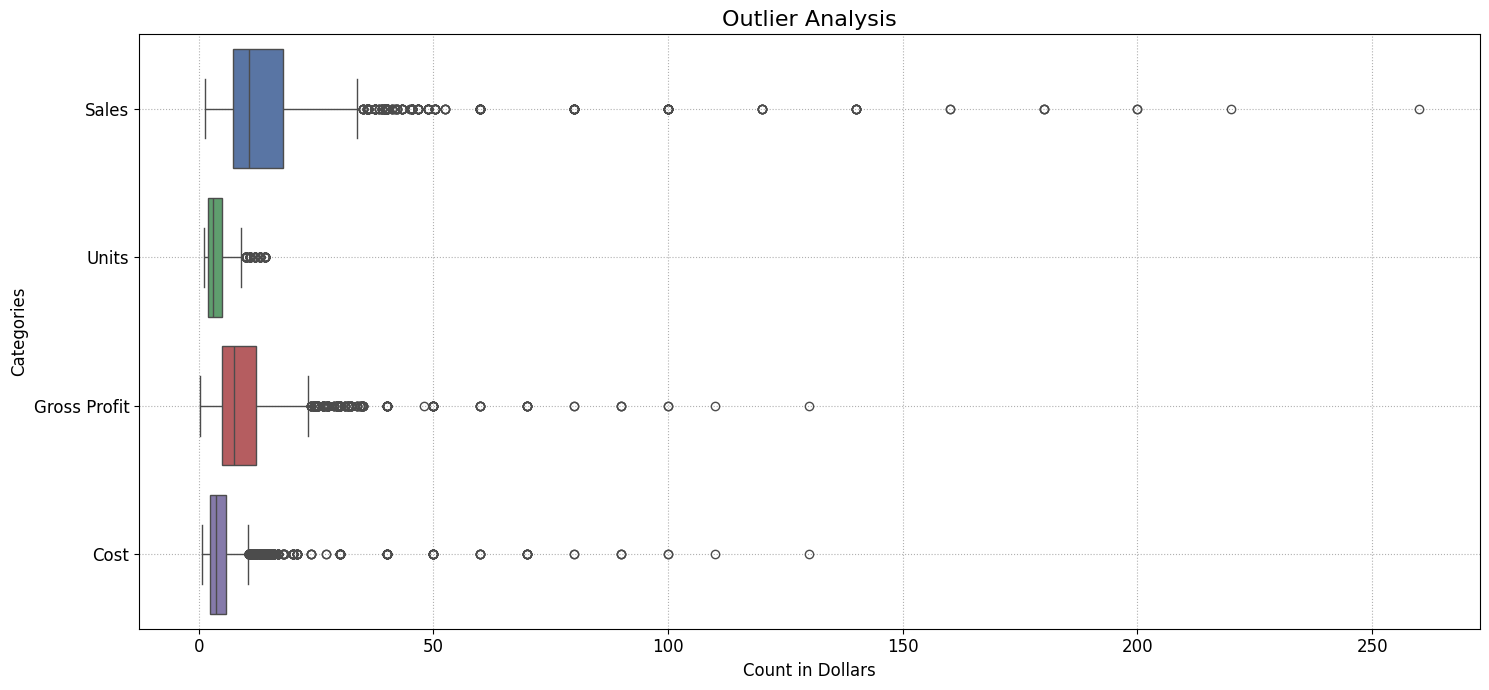

In [15]:
# listing numerical columns
numeric_cols = ['Sales', 'Units', 'Gross Profit', 'Cost']

# Reshape dataframe to long format
df_long = df[numeric_cols].melt(var_name='Metric', value_name='Value')

# Creating a custom empty canvas
figure = plt.figure(figsize=[15, 7])

# Create grouped box plot
sns.boxplot(
    x='Value',
    y='Metric',
    palette=['#4C72B0', '#55A868', '#C44E52', '#8172B2'],
    data=df_long
)

# Aesthetics
plt.xticks(size=12)
plt.yticks(size=12)
plt.xlabel(xlabel='Count in Dollars', size=12)
plt.ylabel(ylabel='Categories', size=12)
plt.title(label='Outlier Analysis', size=16)
plt.grid(linestyle=':')
plt.tight_layout()
plt.show()

#### **Observation:**
- No duplicate records or missing values were identified in the dataset.
- Incorrect data types have been standardized.
- All financial integrity checks passed successfully. No transactions with zero or negative sales, cost, units, or gross profit were identified. Additionally, gross profit values were found to be fully consistent with the calculated difference between sales and cost (after rounding for currency precision).
- Product and division labels have been standardized.

# **6. Feature Engineering & Metric Creation** 
The objective of this section is to transform raw transactional data into meaningful financial indicators that capture profitability, efficiency, and contribution at both product and division levels.
These derived metrics enable deeper margin analysis, profitability ranking, dependency assessment, and risk diagnostics in subsequent steps.

### **6.1 Gross Margin**
Gross Margin (%) = Gross Profit ÷ Sales
- **Gross Margin** measures profit efficiency relative to sales.

In [16]:
df['Gross Margin'] = df['Gross Profit'] / df['Sales']

### **6.2 Profit per Unit**
Profit per Unit = Gross Profit ÷ Units
- **Profit per Unit** evaluates profitability at the unit level, independent of sales volume.

In [17]:
df['Profit per Unit'] = df['Gross Profit'] / df['Units']

### **6.3 Cost Ratio**
Cost Ratio = Cost ÷ Sales
- **Cost Ratio** indicates how much of sales revenue is consumed by cost.

In [18]:
df['Cost Ratio'] = df['Cost']/df['Sales']

### **6.4 Revenue per Unit**
Revenue per Unit = Sales ÷ Units
- Revenue per Unit reflects effective pricing per unit sold.

In [19]:
df['Revenue Per Unit'] = df['Sales']/df['Units']

# **7. EDA**

### **7.1 Gross Margin – Distribution Analysis**

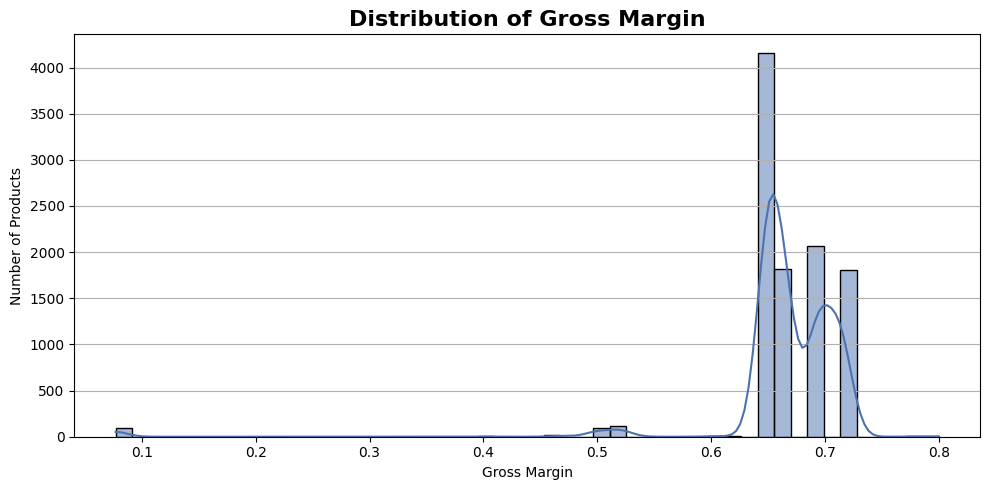

In [20]:
# Create a Matplotlib figure (canvas) and axis for visualization
fig, my_canvas = plt.subplots(figsize=(10,5))

# Plot a histogram of Distribution of Gross Margin
sns.histplot(
    data=df, 
    x='Gross Margin', 
    ax=my_canvas, 
    color='#4C72B0',
    bins=50, 
    kde=True)

# Aesthetics
plt.title(
    'Distribution of Gross Margin', 
    size=16,
    fontweight='bold'
)
plt.xlabel('Gross Margin')
plt.ylabel('Number of Products')
plt.grid(linestyle='-', axis='y')
plt.tight_layout()
plt.show()

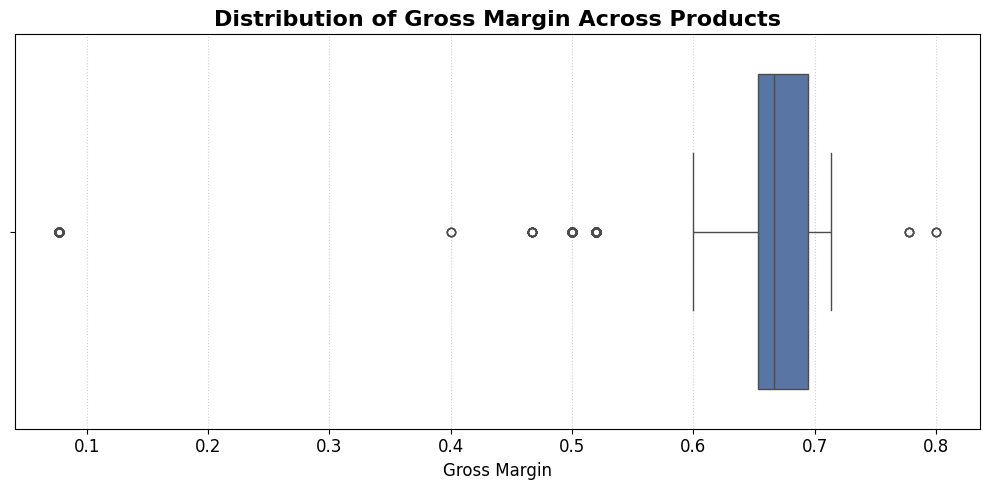

In [21]:
# Create a Matplotlib figure (canvas) and axis for visualization
fig, my_canvas = plt.subplots(figsize=(10,5))

# Create horizontal box plot
sns.boxplot(
    x=df['Gross Margin'],
    color='#4C72B0',
    orient='h'
)

# Aesthetics
plt.xticks(size=12)
plt.yticks(size=12)

plt.xlabel('Gross Margin', size=12)

plt.title(
    'Distribution of Gross Margin Across Products',
    size=16,
    fontweight='bold'
)

plt.grid(axis='x', linestyle=':', alpha=0.6)
plt.legend().remove()
plt.tight_layout()
plt.show()


#### **Observations:**

- **Outliers Present:**  
  Both the histogram and box plot indicate the presence of **outliers at the lower and upper extremes** of Gross Margin, suggesting products with unusually low and unusually high margins.

- **Skewness:**  
  The distribution is **left-skewed (negatively skewed)**, characterized by a **longer tail on the lower-margin side**, driven by a small number of products with significantly reduced or negative margins.

- **Central Tendency:**  
  The **median Gross Margin lies closer to the upper quartile**, reinforcing the impact of low-margin outliers pulling the distribution leftward.

- **Business Implication:**  
  While most products operate within a reasonable margin range, **loss-making or near-zero margin SKUs** may be disproportionately influencing overall margin performance and warrant further investigation.


### **7.2 Product-Level Profitability Analysis**

#### **Top 10 Products by Gross Profit**

In [22]:
# Aggregate gross profit at the product level and get top 10 products
top_grossing_prods = df.groupby(['Product Name']).agg({'Gross Profit': 'sum'}).sort_values('Gross Profit', ascending = False).head(10)
top_grossing_prods

,Gross Profit
Product Name,
Wonka Bar -Scrumdiddlyumptious,19357.500
Wonka Bar - Triple Dazzle Caramel,18610.200
Wonka Bar - Milk Chocolate,17443.370
Wonka Bar - Nutty Crunch Surprise,16819.950
Wonka Bar - Fudge Mallows,16593.600
Lickable Wallpaper,3930.000
Wonka Gum,310.700
Everlasting Gobstopper,104.000
Kazookles,92.750


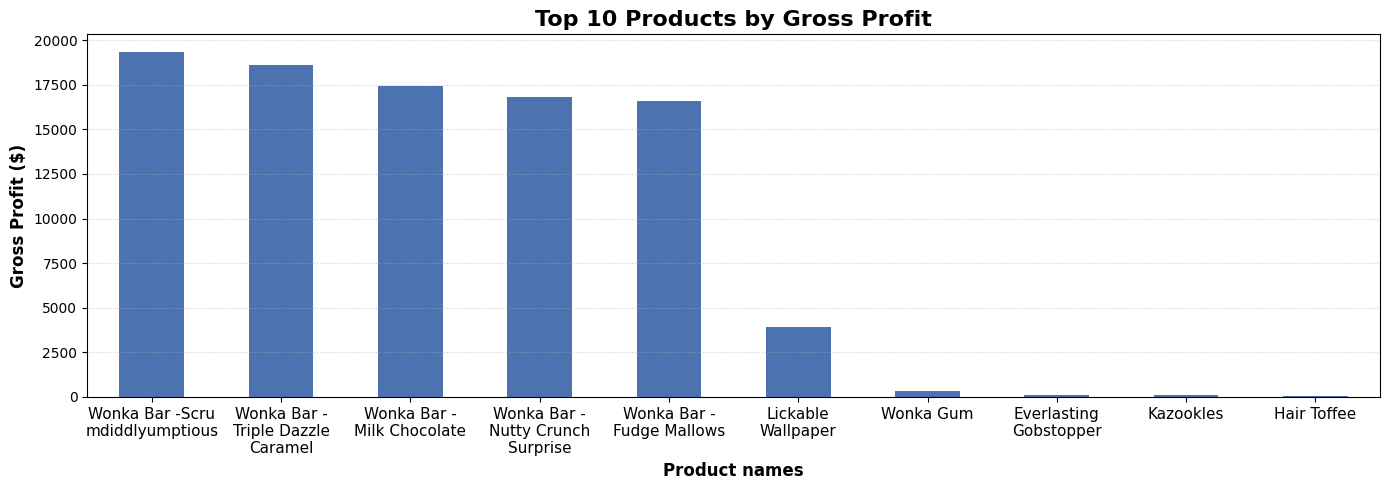

In [23]:
# Top 10 Products by Gross Profit

# Wrap each product name after 15 characters to avoid label overlap on x-axis
labels = [textwrap.fill(label, 15) for label in top_grossing_prods.index]

# Create a Matplotlib figure (canvas) and axis for plotting
fig, my_canvas = plt.subplots(figsize=(14,5))

# Plot the top 10 sales data as a bar chart
top_grossing_prods.plot(ax=my_canvas, kind='bar', color='#4C72B0')

# Set custom x-axis tick positions based on label count
my_canvas.set_xticks(range(len(labels)))

# Replace default tick labels with wrapped product names
# rotation=0 keeps labels horizontal, ha='center' centers them under bars
my_canvas.set_xticklabels(labels, rotation=0, ha='center', fontsize=11)

# Aesthetics
plt.title('Top 10 Products by Gross Profit', size=16, fontweight='bold')
plt.xlabel('Product names', fontsize = 12, fontweight='bold')
plt.ylabel('Gross Profit ($)', fontsize = 12, fontweight='bold')
plt.legend().remove()
plt.grid(axis='y', linestyle=':', alpha=0.6)
plt.tight_layout()
plt.show()

#### **Top 10 Products by Gross Margin (%)**

In [24]:
# Aggregate gross margin at the product level and get top 10 products
top_margin_products = df.groupby('Product Name').agg({'Gross Margin': 'mean'}).sort_values('Gross Margin', ascending=False).head(10)
top_margin_products

,Gross Margin
Product Name,
Everlasting Gobstopper,0.800
Hair Toffee,0.778
Wonka Bar - Nutty Crunch Surprise,0.713
Wonka Bar -Scrumdiddlyumptious,0.694
Wonka Bar - Fudge Mallows,0.667
Wonka Bar - Triple Dazzle Caramel,0.653
Wonka Bar - Milk Chocolate,0.649
Laffy Taffy,0.623
Fizzy Lifting Drinks,0.600


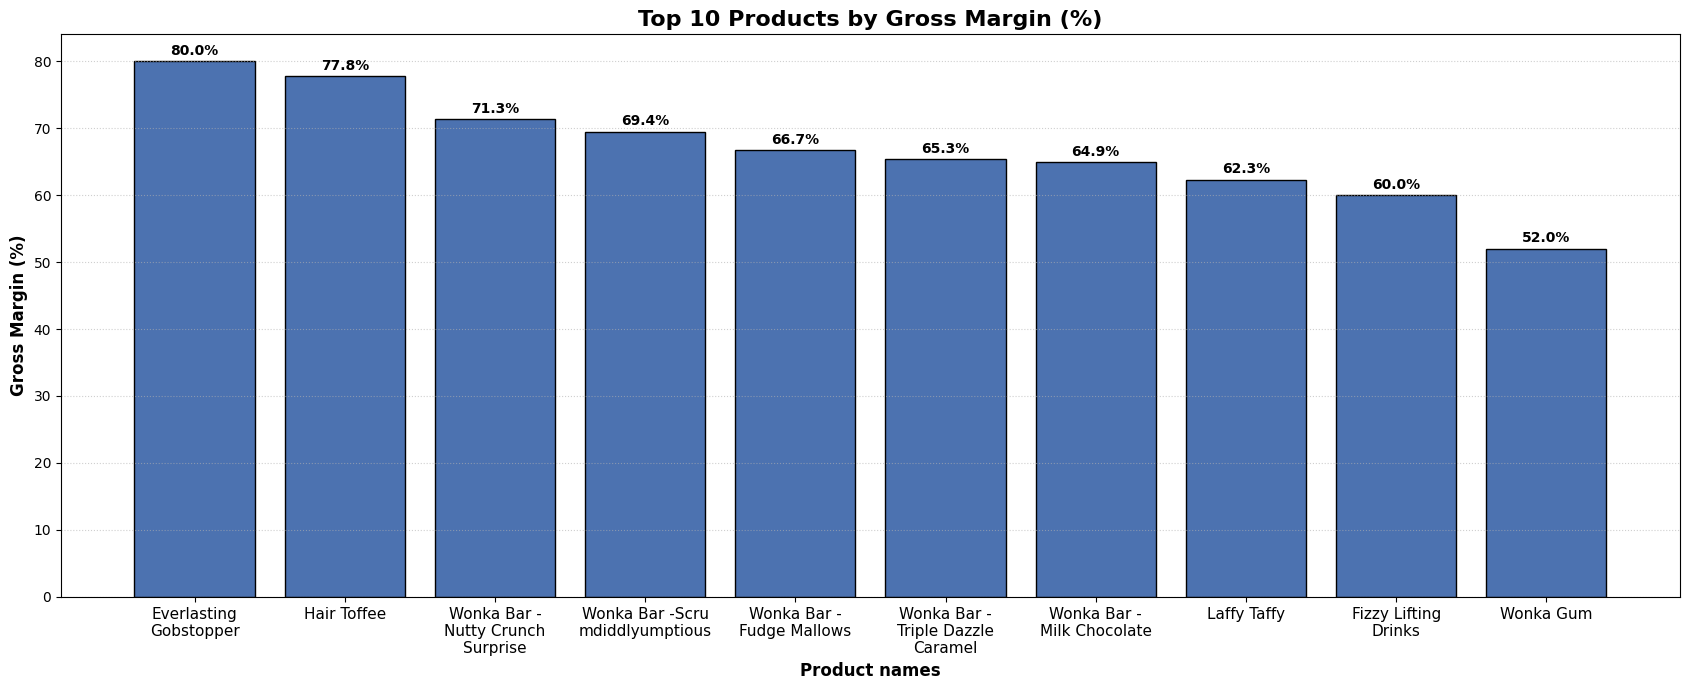

In [25]:
# Convert Gross Margin column to numeric and scale to %
top_margin_products['Gross Margin'] = top_margin_products['Gross Margin'].astype(float) * 100

# Wrap product names for x-axis
labels = [textwrap.fill(name, 15) for name in top_margin_products.index]

# Create figure
plt.figure(figsize=(17,7))

# Plot bar chart using the numeric series
plt.bar(range(len(top_margin_products)), top_margin_products['Gross Margin'], color='#4C72B0', edgecolor='black')

# Set x-axis labels
plt.xticks(range(len(labels)), labels, rotation=0, ha='center', fontsize=11)

# Annotate bars
for i, value in enumerate(top_margin_products['Gross Margin']):
    plt.text(i, value + 0.5, f'{value:.1f}%', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Titles and labels
plt.title('Top 10 Products by Gross Margin (%)', fontsize=16, fontweight='bold')
plt.xlabel('Product names', fontsize=12, fontweight='bold')
plt.ylabel('Gross Margin (%)', fontsize=12, fontweight='bold')

plt.grid(axis='y', linestyle=':', alpha=0.6)
plt.tight_layout()
plt.show()


#### **Product Segmentation**

In [26]:
# Aggregate total sales, total gross profit, and mean gross margin per product
product_metrics = df.groupby('Product Name').agg({
    'Sales': 'sum',
    'Gross Profit': 'sum',
    'Gross Margin': 'mean'
}).reset_index()
product_metrics.head()

,Product Name,Sales,Gross Profit,Gross Margin
0,Everlasting Gobstopper,130.000,104.000,0.800
1,Fizzy Lifting Drinks,78.750,47.250,0.600
2,Fun Dip,12.000,4.800,0.400
3,Hair Toffee,76.500,59.500,0.778
4,Kazookles,1205.750,92.750,0.077


In [27]:
# Function to categorize products
def categorize_product(row):
    if row['Gross Profit'] >= product_metrics['Gross Profit'].quantile(0.75) and \
       row['Gross Margin'] >= product_metrics['Gross Margin'].quantile(0.75):
        return 'High-Profit / High-Margin'
    elif row['Sales'] >= product_metrics['Sales'].quantile(0.75) and \
         row['Gross Margin'] < product_metrics['Gross Margin'].quantile(0.25):
        return 'High-Sales / Low-Margin'
    elif row['Sales'] < product_metrics['Sales'].quantile(0.25) and \
         row['Gross Profit'] < product_metrics['Gross Profit'].quantile(0.25):
        return 'Low-Sales / Low-Profit'
    else:
        return 'Other'

# Applying categorization
product_metrics['Category'] = product_metrics.apply(categorize_product, axis=1)
product_metrics

,Product Name,Sales,Gross Profit,Gross Margin,Category
0,Everlasting Gobstopper,130.000,104.000,0.800,Other
1,Fizzy Lifting Drinks,78.750,47.250,0.600,Other
2,Fun Dip,12.000,4.800,0.400,Low-Sales / Low-Profit
3,Hair Toffee,76.500,59.500,0.778,Other
4,Kazookles,1205.750,92.750,0.077,Other
5,Laffy Taffy,53.730,33.480,0.623,Low-Sales / Low-Profit
6,Lickable Wallpaper,7860.000,3930.000,0.500,Other
7,Nerds,15.000,7.000,0.467,Low-Sales / Low-Profit
8,Sweetarts,61.500,28.700,0.467,Low-Sales / Low-Profit
9,Wonka Bar - Fudge Mallows,24890.400,16593.600,0.667,Other


In [28]:
# Check number of products in each category
product_metrics['Category'].value_counts()

Category
Other                        9
Low-Sales / Low-Profit       4
High-Profit / High-Margin    2
Name: count, dtype: int64

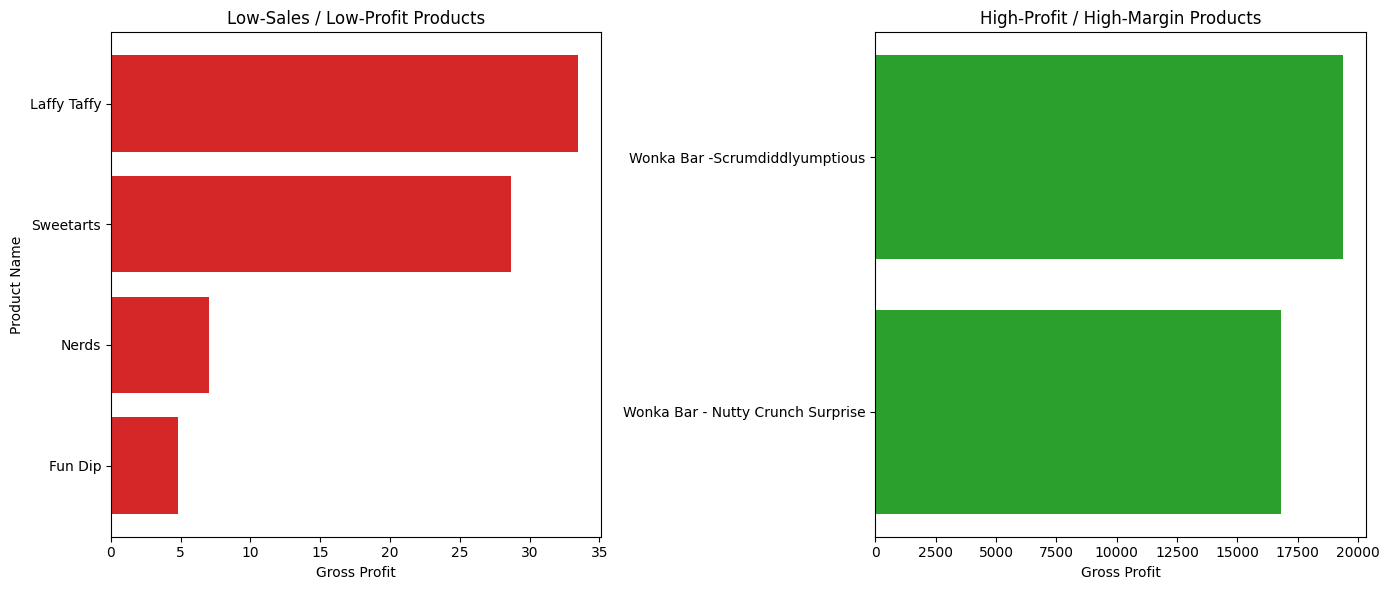

In [30]:
# Create a matplotlib canvas with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Filter low-sales / low-profit products
ls_lp = product_metrics[
    product_metrics['Category'] == 'Low-Sales / Low-Profit'
].sort_values('Gross Profit')

# Plot low-sales / low-profit products on first subplot
axes[0].barh(
    ls_lp['Product Name'],
    ls_lp['Gross Profit'],
    color='#d62728'
)

# Set title and labels for low-sales / low-profit plot
axes[0].set_title('Low-Sales / Low-Profit Products')
axes[0].set_xlabel('Gross Profit')
axes[0].set_ylabel('Product Name')


# Filter high-profit / high-margin products
hp_hm = product_metrics[
    product_metrics['Category'] == 'High-Profit / High-Margin'
].sort_values('Gross Profit')

# Plot high-profit / high-margin products on second subplot
axes[1].barh(
    hp_hm['Product Name'],
    hp_hm['Gross Profit'],
    color='#2ca02c'
)

# Set title and labels for high-profit / high-margin plot
axes[1].set_title('High-Profit / High-Margin Products')
axes[1].set_xlabel('Gross Profit')
# axes[1].set_ylabel('Product Name')


# Adjust layout to avoid overlap
plt.tight_layout()

# Display the combined figure
plt.show()


### **7.3 Division-Level Performance Analysis**

#### **Average margin by division**

In [31]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Country/Region', 'City', 'State/Province',
       'Postal Code', 'Division', 'Region', 'Product ID', 'Product Name',
       'Sales', 'Units', 'Gross Profit', 'Cost', 'Gross Margin',
       'Profit per Unit', 'Cost Ratio', 'Revenue Per Unit'],
      dtype='object')

In [37]:
df['Division'].value_counts()

Division
Chocolate    9844
Other         310
Sugar          40
Name: count, dtype: int64

In [39]:
# Aggregate total sales, total gross profit, and average gross margin by division
division_metrics = df.groupby('Division').agg({
    'Sales': 'sum',
    'Gross Profit': 'sum',
    'Gross Margin': 'mean'
}).reset_index()

division_metrics


,Division,Sales,Gross Profit,Gross Margin
0,Chocolate,131692.900,88824.620,0.675
1,Other,9663.250,4333.450,0.377
2,Sugar,427.480,284.730,0.577


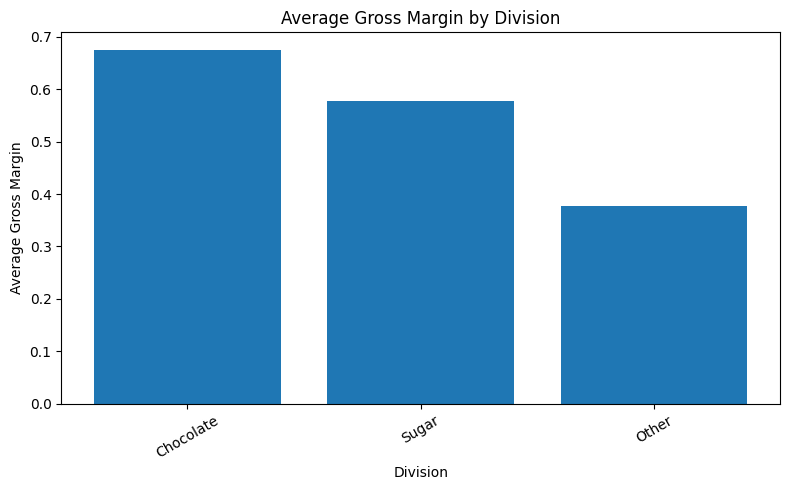

In [41]:
# Sort divisions by average gross margin
division_margin_sorted = division_metrics.sort_values('Gross Margin', ascending=False)

# Create a matplotlib figure
plt.figure(figsize=(8,5))

# Plot average gross margin by division
plt.bar(
    division_margin_sorted['Division'],
    division_margin_sorted['Gross Margin'],
    color='#1f77b4'
)

# Aesthetics 
plt.title('Average Gross Margin by Division')
plt.xlabel('Division')
plt.ylabel('Average Gross Margin')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

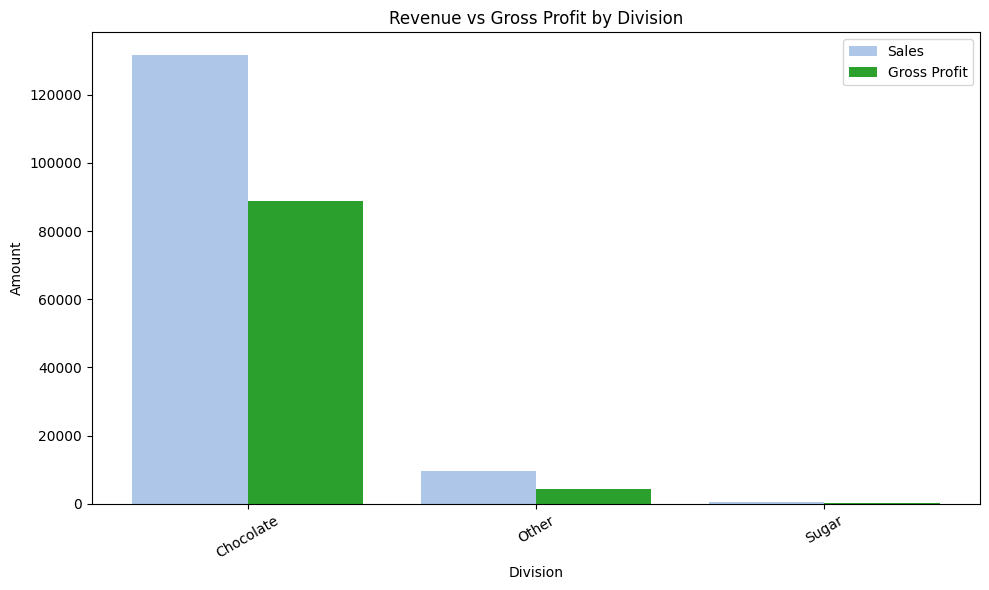

In [42]:
# Set bar positions for grouped bar chart
x = range(len(division_metrics))

# Create a matplotlib figure
plt.figure(figsize=(10,6))

# Plot total sales bars
plt.bar(
    x,
    division_metrics['Sales'],
    width=0.4,
    label='Sales',
    color='#aec7e8'
)

# Plot total gross profit bars
plt.bar(
    [i + 0.4 for i in x],
    division_metrics['Gross Profit'],
    width=0.4,
    label='Gross Profit',
    color='#2ca02c'
)

# Aesthetics
plt.xticks(
    [i + 0.2 for i in x],
    division_metrics['Division'],
    rotation=30
)

plt.title('Revenue vs Gross Profit by Division')
plt.xlabel('Division')
plt.ylabel('Amount')
plt.legend()
plt.tight_layout()
plt.show()